In [184]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 42
%matplotlib inline

In [226]:
ms = ['kskipmrr', 'adaptivekskipmrr']
# ts = ['EFG', 'reduced']
ts = ['reduced']
# ss = ['2801', '6881', '10601']
ss = ['10601']
# ks = range(11)
ks = [0, 1, 3, 5, 7]
# ps = [1, 2, 4, 8 ,16]
ps = [1, 4, 16]

In [219]:
def ds(ps, ks, ss, ts, ms):
    arr = []
    for p in ps:
        for k in ks:
            for s in ss:
                for t in ts:
                    for m in ms:
                        d = f'data/20201109_04/{m}_{t}{s}_k{k:02d}_gpu{p}'
                        arr.append({
                            'n': np.load(f'{d}/nosl.npy'), 
                            'r': np.load(f'{d}/residual.npy'), 
                            't': np.load(f'{d}/time.npy'),
                            'kbt': np.load(f'{d}/kbt.npy')
                        })
                        if m is 'adaptivekskipmrr':
                            arr[-1]['k'] = np.load(f'{d}//khistory.npy')
    return arr

In [220]:
# # k-skip MrR k
# ksmrr = ds(ps[0:1], ks, ss, ts, ms[0:1])
# plt.figure(figsize=(16, 12))
# plt.rcParams["font.size"] = 20
# plt.yscale('log')
# plt.grid()
# plt.xlabel('Number of Solution Updates')
# plt.ylabel('Residual Norm')
# plt.xlim(0, 4000)
# plt.ylim(1e-8, 1e-4)
# for i, k in enumerate(ks[0:]):
#     plt.plot(ksmrr[i]['n'], ksmrr[i]['r'], '-o', linewidth=1, label=f'$k$={k}', markersize=1)
# plt.legend(ncol=len(ks)//3 + 1, fontsize=24)
# plt.show()
# # plt.savefig('./img/kmrr.png')

15


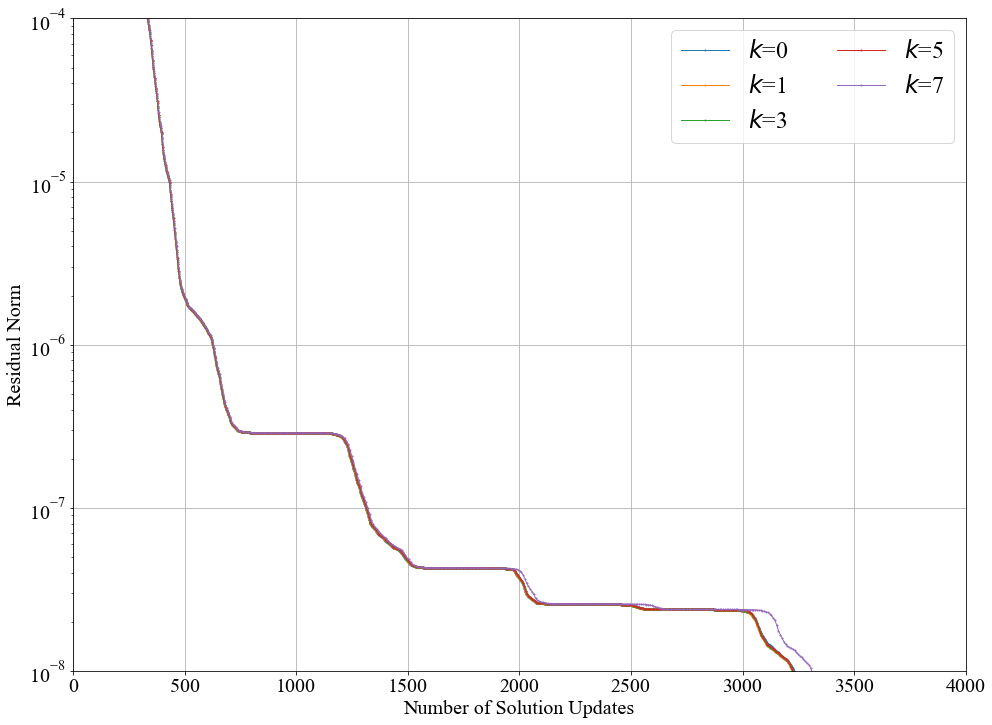

In [227]:
# adaptive k-skip MrR k
aksmrr = ds(ps, ks, ss, ts, ms[1:2])
print(len(aksmrr))
plt.figure(figsize=(16, 12))
plt.rcParams["font.size"] = 20
plt.yscale('log')
plt.grid()
plt.xlabel('Number of Solution Updates')
plt.ylabel('Residual Norm')
# plt.xlim(0, 200)
plt.xlim(0, 4000)
plt.ylim(1e-8, 1e-4)
for i, k in enumerate(ks[0:]):
    plt.plot(aksmrr[i]['n'], aksmrr[i]['r'], '-o', linewidth=1, label=f'$k$={k}', markersize=1)
    # print(aksmrr[k]['k'][-1])
plt.legend(ncol=len(ks)//3 + 1, fontsize=24)
plt.show()
# plt.savefig('./img/kmrr.png')

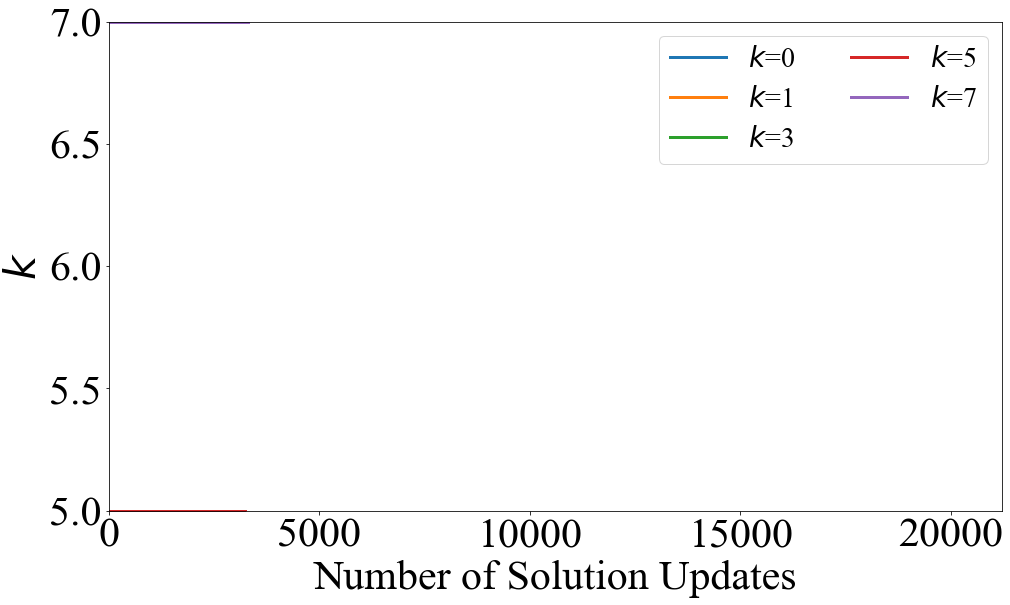

In [189]:
plt.figure(figsize=(16, 9))
plt.rcParams["font.size"] = 42
plt.xlabel('Number of Solution Updates')
plt.ylabel('$k$')
plt.xlim(0, 10601 * 2)
plt.ylim(5, ks[-1])
for i, k in enumerate(ks):
    plt.plot(aksmrr[i]['n'], aksmrr[i]['k'], '-o', linewidth=3, label=f'$k$={k}', markersize=1)
plt.legend(ncol=len(ks)//2, fontsize=28)
plt.show()
# plt.savefig('./img/k.png')

5


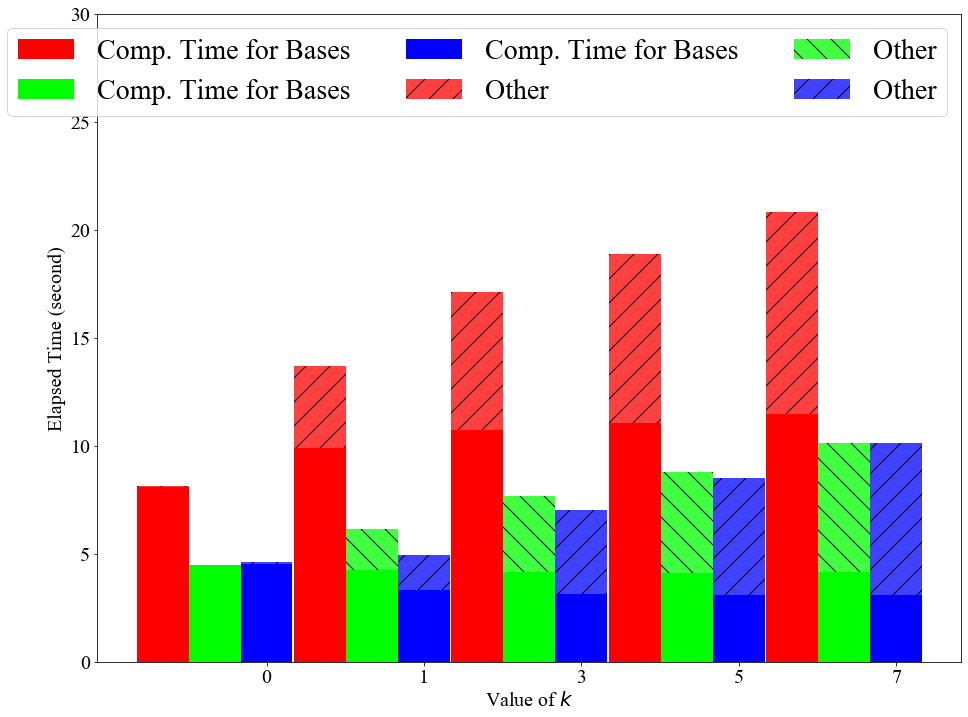

In [247]:
l = len(aksmrr) // 3
print(l)
plt.figure(figsize=(16, 12))
plt.rcParams["font.size"] = 20
plt.xlabel('Value of $k$')
plt.ylabel('Elapsed Time (second)')
plt.ylim(0, 30)
plt.subplots_adjust(left=0.15, right=0.90, bottom=0.15, top=0.90)
tkmrr = []; takmrr = []
ktbkmrr = []; ktbakmrr = []
bottom = []

for i in range(15):
    # tkmrr.append(ksmrr[i]['t'])
    bottom.append(aksmrr[i]['t'] - aksmrr[i]['kbt'].sum())
    takmrr.append(aksmrr[i]['t'])
    # ktbkmrr.append(ksmrr[i]['kbt'].sum())
    ktbakmrr.append(aksmrr[i]['kbt'].sum())


# plt.bar(0, res_mrr['time'], color=(0.75,0.25,0.25), width=0.33, align='center', tick_label=[0], label="MrR")  
plt.bar(np.arange(l)-0.33, takmrr[:5], width=0.33, align='center', color=(1,0,0), tick_label=ks, label="Comp. Time for Bases")
plt.bar(np.arange(l), takmrr[5:10], width=0.33, align='center', color=(0,1,0), tick_label=ks, label="Comp. Time for Bases")
# plt.plot(np.arange(l)+0.33, tkmrr[0::2], '-o', linewidth=3, color=(0.5,1,0.5), markersize=10)
plt.bar(np.arange(l)+0.33, takmrr[10:15], width=0.33, align='center', color=(0,0,1), tick_label=ks, label="Comp. Time for Bases")
# plt.plot(np.arange(l)+0.66, takmrr, '-o', linewidth=3, color=(0.5,0.5,1), markersize=10)
plt.bar(np.arange(l)-0.33, ktbakmrr[:5], width=0.33, align='center', color=(1,0.25,0.25), tick_label=ks, label="Other", bottom=bottom[:5], hatch='/')
plt.bar(np.arange(l), ktbakmrr[5:10], width=0.33, align='center', color=(0.25,1,0.25), tick_label=ks, label="Other", bottom=bottom[5:10], hatch='\\')
# plt.plot(np.arange(l)+0.33, ktbkmrr, '-o', linewidth=3, color=(0.5,1,0.5), markersize=10)
plt.bar(np.arange(l)+0.33, ktbakmrr[10:15], width=0.33, align='center', color=(0.25, 0.25, 1), tick_label=ks, label="Other", bottom=bottom[10:], hatch='/')
# plt.plot(np.arange(l)+0.66, ktbakmrr, '-o', linewidth=3, color=(0.5,0.5,1), markersize=10)

plt.legend(ncol=3, fontsize=28)
plt.show()
# plt.savefig('./img/time.png')

In [191]:
l = len(ks)
plt.figure(figsize=(16, 12))
plt.rcParams["font.size"] = 20
plt.xlabel('Initial $k$')
plt.ylabel('Elapsed Time (second)')
plt.ylim(0, 20)
plt.subplots_adjust(left=0.15, right=0.90, bottom=0.15, top=0.90)
tkmrr = []; takmrr = []
for i, k in enumerate(ks):
    # tkmrr.append(ksmrr[i]['kbt'].sum())
    takmrr.append(aksmrr[i]['kbt'].sum())
    ktbakmrr.append(aksmrr[i]['kbt'].sum())

# plt.bar(0, res_mrr['time'], color=(0.75,0.25,0.25), width=0.33, align='center', tick_label=[0], label="MrR")   
# plt.bar(np.arange(l)+0.33, tkmrr, width=0.33, align='center', color=(0.25,0.75,0.25), tick_label=ks, label="$k$-skip MrR")
# plt.plot(np.arange(l)+0.33, tkmrr, '-o', linewidth=3, color=(0.5,1,0.5), markersize=10)
plt.bar(np.arange(l)+0.66, takmrr, width=0.33, align='center', color=(0.25,0.25,0.75), tick_label=ks, label="adaptive $k$-skip MrR")
plt.plot(np.arange(l)+0.66, takmrr, '-o', linewidth=3, color=(0.5,0.5,1), markersize=10)
plt.legend(ncol=3, fontsize=28)
plt.show()
# plt.savefig('./img/time.png')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [100]:
w = 0.166
plt.rcParams["font.size"] = 42
plt.figure(figsize=(16, 12))
plt.xlabel('Initial $k$')
plt.ylabel('Elapsed Time (second)')
plt.ylim(0, 100)
plt.subplots_adjust(left=0.15, right=0.90, bottom=0.15, top=0.90)
tkmrr = []; takmrr = []; tkmrr_cpu = []; takmrr_cpu = []
l_ks = [0, 5, 10]
l = len(l_ks)
for k in l_ks:
    tkmrr.append(res_kmrr[k]['time'])
    takmrr.append(res_akmrr[k]['time'])
    tkmrr_cpu.append(np.load(f'{d}/cpu/kskipmrr/{k:02d}/time.npy'))
    takmrr_cpu.append(np.load(f'{d}/cpu/adaptivekskipmrr/{k:02d}/time.npy'))

plt.bar(0, res_mrr['time'], color=(0.75,0.25,0.25), width=w, align='center', tick_label=[0], label="MrR (GPU)")
plt.bar(w, np.load(f'{d}/cpu/mrr/time.npy'), color=(0.5,0,0.2), width=w, align='center', tick_label=[0], label="MrR (CPU)")

plt.bar(np.arange(l)+(w*2), tkmrr, width=w, align='center', color=(0.25,0.75,0.25), tick_label=l_ks, label="$k$-skip MrR (GPU)")
plt.bar(np.arange(l)+w * 3, tkmrr_cpu, width=w, align='center', color=(0.1,0.5,0.1), tick_label=l_ks, label="$k$-skip MrR (CPU)")

plt.bar(np.arange(l)+w*4, takmrr, width=w, align='center', color=(0.25,0.25,0.75), tick_label=l_ks, label="adaptive $k$-skip MrR (GPU)")
plt.bar(np.arange(l)+w*5, takmrr_cpu, width=w, align='center', color=(0.2,0,0.5), tick_label=l_ks, label="adaptive $k$-skip MrR (CPU)")


plt.legend(ncol=3, fontsize=22)
plt.show()
# plt.savefig('./img/gpuvscpu.png')

NameError: name 'res_kmrr' is not defined

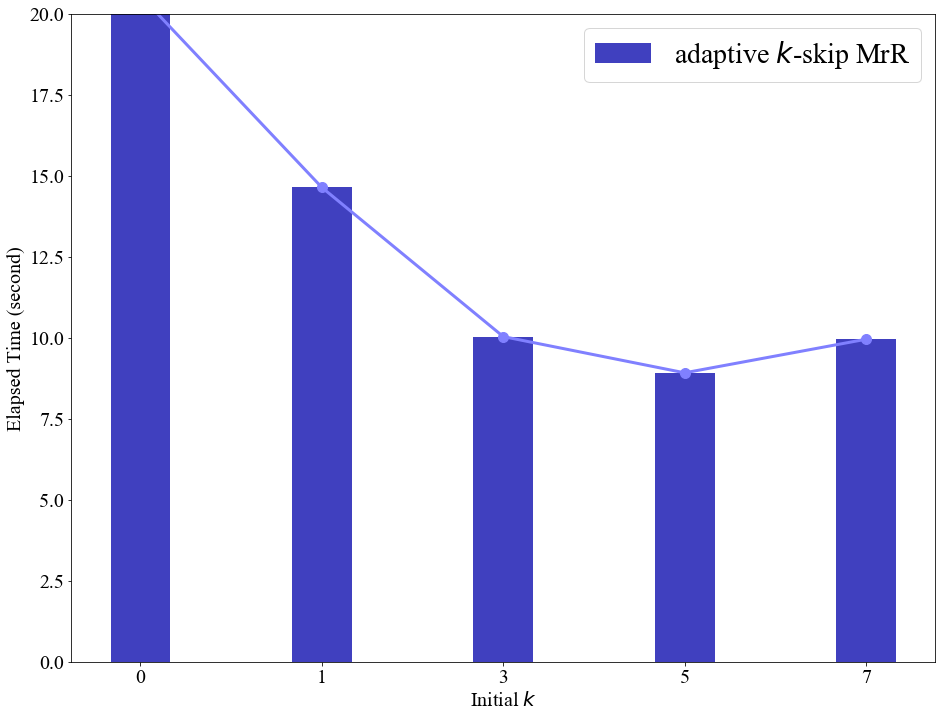

In [102]:
# k=7, ps=all
aksmrr = ds(ps, ks[-1:], ss, ts, ms[1:2])

l = len(ks)
plt.figure(figsize=(16, 12))
plt.rcParams["font.size"] = 20
plt.xlabel('Initial $k$')
plt.ylabel('Elapsed Time (second)')
plt.ylim(0, 20)
plt.subplots_adjust(left=0.15, right=0.90, bottom=0.15, top=0.90)
takmrr = []
# for i, k in enumerate(ks):
for i, p in enumerate(ps):
    takmrr.append(aksmrr[i]['t'])

# plt.bar(0, res_mrr['time'], color=(0.75,0.25,0.25), width=0.33, align='center', tick_label=[0], label="MrR")   
plt.bar(np.arange(l)+0.66, takmrr, width=0.33, align='center', color=(0.25,0.25,0.75), tick_label=ks, label="adaptive $k$-skip MrR")
plt.plot(np.arange(l)+0.66, takmrr, '-o', linewidth=3, color=(0.5,0.5,1), markersize=10)
plt.legend(ncol=3, fontsize=28)
plt.show()
# plt.savefig('./img/time.png')

In [133]:
pre = np.load('data/20201109_02/adaptivekskipmrr_reduced10601_k07_gpu16/kbt.npy')

In [134]:
new = np.load('data/20201109_03/adaptivekskipmrr_reduced10601_k00_gpu1/kbt.npy')[:417] 

In [135]:
new - pre

array([-0.01645031, -0.00502964, -0.0032365 , -0.00224725, -0.0031478 ,
       -0.00222036, -0.00226833, -0.0022451 , -0.00227408, -0.00288961,
       -0.00223355, -0.00225091, -0.00363149, -0.00215568, -0.00218526,
       -0.00219501, -0.0022121 , -0.00221399, -0.0021773 , -0.00220805,
       -0.00219134, -0.00218399, -0.0021667 , -0.00214812, -0.0021806 ,
       -0.00215632, -0.00323429, -0.00219907, -0.0022046 , -0.00221979,
       -0.00217287, -0.00227965, -0.00219481, -0.00416736, -0.00320775,
       -0.00221425, -0.0022245 , -0.00220927, -0.00219038, -0.00221345,
       -0.00219787, -0.00219712, -0.00226884, -0.00224345, -0.00283854,
       -0.00229477, -0.0021909 , -0.00242101, -0.00218778, -0.00222162,
       -0.00225455, -0.00220768, -0.00224706, -0.00219703, -0.00220543,
       -0.00224724, -0.0022521 , -0.00221485, -0.00349495, -0.0022112 ,
       -0.00219335, -0.00223036, -0.00221352, -0.00219266, -0.00221279,
       -0.00220247, -0.00180432, -0.00226109, -0.00222204, -0.00